# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset_train = pd.read_csv(r"D:\hacktoberfest\Sorting_algo\Projects\LSTM Stock Prediction\Google_Stock_Price_Train.csv")

In [3]:
dataset_train.head()

Date    Open    High     Low   Close      Volume
0  1/3/2012  325.25  332.83  324.97  663.59   7,380,500
1  1/4/2012  331.27  333.87  329.08  666.45   5,749,400
2  1/5/2012  329.83  330.75  326.89  657.21   6,590,300
3  1/6/2012  328.34  328.77  323.68  648.24   5,405,900
4  1/9/2012  322.04  322.29  309.46  620.76  11,688,800

In [4]:
training_set = dataset_train.iloc[:,1:2].values

In [5]:
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

# Feature Scaling

In [6]:
from sklearn.preprocessing import MinMaxScaler
fs=MinMaxScaler(feature_range=(0,1))
training_set_scaled=fs.fit_transform(training_set)

In [7]:
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [8]:
#creating a datastructure with 60 timestamps and 1 output
x_train=[]
y_train=[]
for i in range(60,1258):
    x_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])

In [9]:
x_train

[array([0.08581368, 0.09701243, 0.09433366, 0.09156187, 0.07984225,
        0.0643277 , 0.0585423 , 0.06568569, 0.06109085, 0.06639259,
        0.0614257 , 0.07474514, 0.02797827, 0.02379269, 0.02409033,
        0.0159238 , 0.01078949, 0.00967334, 0.01642607, 0.02100231,
        0.02280676, 0.02273235, 0.02810849, 0.03212665, 0.0433812 ,
        0.04475779, 0.04790163, 0.0440695 , 0.04648783, 0.04745517,
        0.04873875, 0.03936305, 0.04137213, 0.04034898, 0.04784582,
        0.04325099, 0.04356723, 0.04286033, 0.04602277, 0.05398467,
        0.05738894, 0.05714711, 0.05569611, 0.04421832, 0.04514845,
        0.04605997, 0.04412531, 0.03675869, 0.04486941, 0.05065481,
        0.05214302, 0.05612397, 0.05818885, 0.06540665, 0.06882953,
        0.07243843, 0.07993526, 0.07846566, 0.08034452, 0.08497656]),
 array([0.09701243, 0.09433366, 0.09156187, 0.07984225, 0.0643277 ,
        0.0585423 , 0.06568569, 0.06109085, 0.06639259, 0.0614257 ,
        0.07474514, 0.02797827, 0.02379269, 0.

In [10]:
y_train

[0.08627874097775134,
 0.08471612471166012,
 0.07454051640747084,
 0.07883771113922167,
 0.07238261775429711,
 0.06663442220403304,
 0.06315574075452046,
 0.06782498697819772,
 0.06823424361931696,
 0.07601011980058048,
 0.08082818662102831,
 0.058077237889723854,
 0.044683384180370544,
 0.044218319815462426,
 0.04202321601309622,
 0.04070243321675715,
 0.030173375995237728,
 0.03512166083785995,
 0.040460599747005,
 0.046859885408140456,
 0.050673413200386985,
 0.04879455316615822,
 0.04027457400104173,
 0.03787484187811596,
 0.045669320633975774,
 0.04224644690825208,
 0.03212664632785178,
 0.04187439541632565,
 0.043083562765086625,
 0.04877595059156181,
 0.04635761589403975,
 0.03748418781159313,
 0.041706972244958784,
 0.053407991666046595,
 0.06810402559714268,
 0.060011905647741615,
 0.03722375176724457,
 0.04920380980727734,
 0.03828409851923509,
 0.04524146141826024,
 0.03768881613215269,
 0.03287074931170475,
 0.025783168390505318,
 0.026304040479202317,
 0.010622070094501002

In [11]:
x_train,y_train=np.array(x_train),np.array(y_train)

In [12]:
x_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [13]:
y_train

array([0.08627874, 0.08471612, 0.07454052, ..., 0.95725128, 0.93796041,
       0.93688146])

In [14]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [15]:
x_train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.07846566],
        [0.08034452],
        [0.08497656]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.08034452],
        [0.08497656],
        [0.08627874]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.08497656],
        [0.08627874],
        [0.08471612]],

       ...,

       [[0.92106928],
        [0.92438053],
        [0.93048218],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.92438053],
        [0.93048218],
        [0.9299055 ],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.93048218],
        [0.9299055 ],
        [0.93113327],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

In [16]:
x_train.ndim

3

# Building the RNN stacked LSTM with dropout Regularization to prevent Overfitting

# Import Libraries

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout

# Create the model

In [18]:
Regressor = Sequential()

# Add Layers

In [19]:
#First Layer
Regressor.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
Regressor.add(Dropout(0.2))

In [20]:
#Second Layer
Regressor.add(LSTM(units=50,return_sequences=True))
Regressor.add(Dropout(0.2))

In [21]:
#Third Layer
Regressor.add(LSTM(units=50,return_sequences=True))
Regressor.add(Dropout(0.2))

In [22]:
#Fourth Layer
Regressor.add(LSTM(units=50))
Regressor.add(Dropout(0.2))

In [23]:
#Output Layer
Regressor.add(Dense(units=1))

# Compile the model

In [24]:
Regressor.compile(optimizer='adam',loss='mean_squared_error')

# Fit the model

In [25]:
Regressor.fit(x_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
38/38 [==============================] - 9s 62ms/step - loss: 0.0355
Epoch 2/100
38/38 [==============================] - 2s 58ms/step - loss: 0.0060
Epoch 3/100
38/38 [==============================] - 2s 58ms/step - loss: 0.0053
Epoch 4/100
38/38 [==============================] - 2s 57ms/step - loss: 0.0056
Epoch 5/100
38/38 [==============================] - 2s 57ms/step - loss: 0.0053
Epoch 6/100
38/38 [==============================] - 2s 56ms/step - loss: 0.0052
Epoch 7/100
38/38 [==============================] - 2s 57ms/step - loss: 0.0047
Epoch 8/100
38/38 [==============================] - 2s 57ms/step - loss: 0.0047
Epoch 9/100
38/38 [==============================] - 2s 58ms/step - loss: 0.0044
Epoch 10/100
38/38 [==============================] - 2s 59ms/step - loss: 0.0044
Epoch 11/100
38/38 [==============================] - 2s 62ms/step - loss: 0.0041
Epoch 12/100
38/38 [==============================] - 2s 60ms/step - loss: 0.0043
Epoch 13/100
38/38 [=====

# Test the model

In [26]:
dataset_test = pd.read_csv(r"D:\hacktoberfest\Sorting_algo\Projects\LSTM Stock Prediction\Google_Stock_Price_Test.csv")

In [28]:
dataset_test

Date    Open    High     Low   Close     Volume
0    1/3/2017  778.81  789.63  775.80  786.14  1,657,300
1    1/4/2017  788.36  791.34  783.16  786.90  1,073,000
2    1/5/2017  786.08  794.48  785.02  794.02  1,335,200
3    1/6/2017  795.26  807.90  792.20  806.15  1,640,200
4    1/9/2017  806.40  809.97  802.83  806.65  1,272,400
5   1/10/2017  807.86  809.13  803.51  804.79  1,176,800
6   1/11/2017  805.00  808.15  801.37  807.91  1,065,900
7   1/12/2017  807.14  807.39  799.17  806.36  1,353,100
8   1/13/2017  807.48  811.22  806.69  807.88  1,099,200
9   1/17/2017  807.08  807.14  800.37  804.61  1,362,100
10  1/18/2017  805.81  806.21  800.99  806.07  1,294,400
11  1/19/2017  805.12  809.48  801.80  802.17    919,300
12  1/20/2017  806.91  806.91  801.69  805.02  1,670,000
13  1/23/2017  807.25  820.87  803.74  819.31  1,963,600
14  1/24/2017  822.30  825.90  817.82  823.87  1,474,000
15  1/25/2017  829.62  835.77  825.06  835.67  1,494,500
16  1/26/2017  837.81  838.00  827.01  832.15  2,973,900
17  1/27/2017  834.71  841.95  820.44  823.31  2,965,800
18  1/30/2017  814.66  815.84  799.80  802.32  3,246,600
19  1/31/2017  796.86  801.25  790.52  796.79  2,160,600

In [29]:
real_stock_price=dataset_test.iloc[:,1:2].values

In [30]:
real_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [31]:
dataset_total=pd.concat((dataset_train['Open'],dataset_test['Open']),axis=0)

In [32]:
dataset_total

0     325.25
1     331.27
2     329.83
3     328.34
4     322.04
       ...  
15    829.62
16    837.81
17    834.71
18    814.66
19    796.86
Name: Open, Length: 1278, dtype: float64

In [33]:
dataset_total.shape

(1278,)

In [34]:
inputs = dataset_total[len(dataset_total)-len(dataset_test)-60:].values

In [35]:
inputs

array([779.  , 779.66, 777.71, 786.66, 783.76, 781.22, 781.65, 779.8 ,
       787.85, 798.24, 803.3 , 795.  , 804.9 , 816.68, 806.34, 801.  ,
       808.35, 795.47, 782.89, 778.2 , 767.25, 750.66, 774.5 , 783.4 ,
       779.94, 791.17, 756.54, 755.6 , 746.97, 755.2 , 766.92, 771.37,
       762.61, 772.63, 767.73, 764.26, 760.  , 771.53, 770.07, 757.44,
       744.59, 757.71, 764.73, 761.  , 772.48, 780.  , 785.04, 793.9 ,
       797.4 , 797.34, 800.4 , 790.22, 796.76, 795.84, 792.36, 790.9 ,
       790.68, 793.7 , 783.33, 782.75, 778.81, 788.36, 786.08, 795.26,
       806.4 , 807.86, 805.  , 807.14, 807.48, 807.08, 805.81, 805.12,
       806.91, 807.25, 822.3 , 829.62, 837.81, 834.71, 814.66, 796.86])

In [36]:
inputs = inputs.reshape(-1,1)

In [37]:
inputs

array([[779.  ],
       [779.66],
       [777.71],
       [786.66],
       [783.76],
       [781.22],
       [781.65],
       [779.8 ],
       [787.85],
       [798.24],
       [803.3 ],
       [795.  ],
       [804.9 ],
       [816.68],
       [806.34],
       [801.  ],
       [808.35],
       [795.47],
       [782.89],
       [778.2 ],
       [767.25],
       [750.66],
       [774.5 ],
       [783.4 ],
       [779.94],
       [791.17],
       [756.54],
       [755.6 ],
       [746.97],
       [755.2 ],
       [766.92],
       [771.37],
       [762.61],
       [772.63],
       [767.73],
       [764.26],
       [760.  ],
       [771.53],
       [770.07],
       [757.44],
       [744.59],
       [757.71],
       [764.73],
       [761.  ],
       [772.48],
       [780.  ],
       [785.04],
       [793.9 ],
       [797.4 ],
       [797.34],
       [800.4 ],
       [790.22],
       [796.76],
       [795.84],
       [792.36],
       [790.9 ],
       [790.68],
       [793.7 ],
       [783.33

In [38]:
inputs = fs.transform(inputs)

In [39]:
inputs

array([[0.9299055 ],
       [0.93113327],
       [0.92750577],
       [0.94415507],
       [0.93876032],
       [0.93403527],
       [0.93483518],
       [0.9313937 ],
       [0.94636878],
       [0.96569685],
       [0.97510976],
       [0.95966962],
       [0.97808617],
       [1.        ],
       [0.98076494],
       [0.97083116],
       [0.98450406],
       [0.96054394],
       [0.9371419 ],
       [0.92841729],
       [0.90804747],
       [0.8771858 ],
       [0.92153434],
       [0.93809063],
       [0.93165414],
       [0.95254483],
       [0.88812412],
       [0.88637547],
       [0.87032145],
       [0.88563137],
       [0.90743359],
       [0.91571173],
       [0.89941588],
       [0.91805566],
       [0.9089404 ],
       [0.9024853 ],
       [0.89456061],
       [0.91600938],
       [0.9132934 ],
       [0.88979835],
       [0.86589404],
       [0.89030062],
       [0.90335962],
       [0.89642086],
       [0.91777662],
       [0.93176576],
       [0.94114145],
       [0.957

In [40]:
x_test = []
for i in range(60,80):
    x_test.append(inputs[i-60:i,0])

In [41]:
x_test

[array([0.9299055 , 0.93113327, 0.92750577, 0.94415507, 0.93876032,
        0.93403527, 0.93483518, 0.9313937 , 0.94636878, 0.96569685,
        0.97510976, 0.95966962, 0.97808617, 1.        , 0.98076494,
        0.97083116, 0.98450406, 0.96054394, 0.9371419 , 0.92841729,
        0.90804747, 0.8771858 , 0.92153434, 0.93809063, 0.93165414,
        0.95254483, 0.88812412, 0.88637547, 0.87032145, 0.88563137,
        0.90743359, 0.91571173, 0.89941588, 0.91805566, 0.9089404 ,
        0.9024853 , 0.89456061, 0.91600938, 0.9132934 , 0.88979835,
        0.86589404, 0.89030062, 0.90335962, 0.89642086, 0.91777662,
        0.93176576, 0.94114145, 0.95762334, 0.96413424, 0.96402262,
        0.96971501, 0.95077759, 0.96294367, 0.96123223, 0.95475854,
        0.95204256, 0.95163331, 0.95725128, 0.93796041, 0.93688146]),
 array([0.93113327, 0.92750577, 0.94415507, 0.93876032, 0.93403527,
        0.93483518, 0.9313937 , 0.94636878, 0.96569685, 0.97510976,
        0.95966962, 0.97808617, 1.        , 0.

In [42]:
x_test = np.array(x_test)

In [43]:
x_test

array([[0.9299055 , 0.93113327, 0.92750577, ..., 0.95725128, 0.93796041,
        0.93688146],
       [0.93113327, 0.92750577, 0.94415507, ..., 0.93796041, 0.93688146,
        0.92955205],
       [0.92750577, 0.94415507, 0.93876032, ..., 0.93688146, 0.92955205,
        0.94731751],
       ...,
       [0.96054394, 0.9371419 , 0.92841729, ..., 1.01045465, 1.02407173,
        1.03930724],
       [0.9371419 , 0.92841729, 0.90804747, ..., 1.02407173, 1.03930724,
        1.03354044],
       [0.92841729, 0.90804747, 0.8771858 , ..., 1.03930724, 1.03354044,
        0.99624228]])

In [44]:
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [45]:
x_test

array([[[0.9299055 ],
        [0.93113327],
        [0.92750577],
        ...,
        [0.95725128],
        [0.93796041],
        [0.93688146]],

       [[0.93113327],
        [0.92750577],
        [0.94415507],
        ...,
        [0.93796041],
        [0.93688146],
        [0.92955205]],

       [[0.92750577],
        [0.94415507],
        [0.93876032],
        ...,
        [0.93688146],
        [0.92955205],
        [0.94731751]],

       ...,

       [[0.96054394],
        [0.9371419 ],
        [0.92841729],
        ...,
        [1.01045465],
        [1.02407173],
        [1.03930724]],

       [[0.9371419 ],
        [0.92841729],
        [0.90804747],
        ...,
        [1.02407173],
        [1.03930724],
        [1.03354044]],

       [[0.92841729],
        [0.90804747],
        [0.8771858 ],
        ...,
        [1.03930724],
        [1.03354044],
        [0.99624228]]])

In [46]:
predicted_stock_price = Regressor.predict(x_test)

1/1 [==============================] - 1s 1s/step


In [47]:
predicted_stock_price

array([[0.9255176 ],
       [0.92065436],
       [0.92115426],
       [0.9237533 ],
       [0.9299447 ],
       [0.9408255 ],
       [0.9508899 ],
       [0.9551714 ],
       [0.95587605],
       [0.95522803],
       [0.95434666],
       [0.95336676],
       [0.9526021 ],
       [0.9532747 ],
       [0.95490706],
       [0.96331114],
       [0.9760445 ],
       [0.9897967 ],
       [0.99741745],
       [0.9900745 ]], dtype=float32)

In [48]:
predicted_stock_price=fs.inverse_transform(predicted_stock_price)

In [49]:
predicted_stock_price

array([[776.64124],
       [774.027  ],
       [774.29565],
       [775.6929 ],
       [779.02106],
       [784.8702 ],
       [790.2804 ],
       [792.582  ],
       [792.96075],
       [792.61237],
       [792.13855],
       [791.6118 ],
       [791.2008 ],
       [791.5623 ],
       [792.4398 ],
       [796.9575 ],
       [803.8025 ],
       [811.1951 ],
       [815.2917 ],
       [811.3444 ]], dtype=float32)

# Visualize the Result

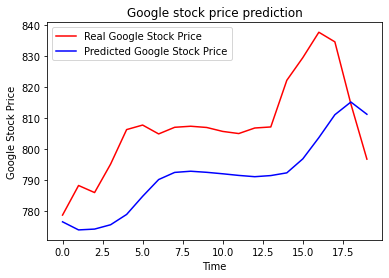

In [50]:
plt.plot(real_stock_price,color='red',label='Real Google Stock Price')
plt.plot(predicted_stock_price,color='blue',label='Predicted Google Stock Price')
plt.title("Google stock price prediction")
plt.xlabel("Time")
plt.ylabel("Google Stock Price")
plt.legend()